In [1]:
import ROOT as rt
import uproot
import h5py 

import numpy as np
import numpy.lib.recfunctions as nlr
import pandas as pd
import os, sys
from matplotlib import pyplot as plt
import math
import json

#import gpustat
#gpustat.print_gpustat()
#os.environ['CUDA_VISIBLE_DEVICES']='3'

Welcome to JupyROOT 6.22/02


In [2]:
# Random Data Selection
def ran_data(num, total):
    sample_num = []
    for i in range(num):
        samp = np.random.randint(0, high=total+1)
        while samp in sample_num:
            samp = np.random.randint(0, high=total+1)
        sample_num.append(samp)
    return sample_num

def samp_to_df(samp_name, total_num):
    dfs = []
    for i in range(total_num+1):
        file_name = f'../HHbbggAna/condor/output/{samp_name}{i}.root'
        samp_file = uproot.open(file_name)
        samp_array = samp_file['tree'].arrays()
        samp_df = pd.DataFrame(samp_array)
        dfs.append(samp_df)
    combine_df = pd.concat(dfs, ignore_index=True)
    return combine_df

# Data loading
def data_to_df(job_run, samp_num):
    file_name = f'../HHbbggAna/condor/output/{job_run}/dataJob1ifile{samp_num}.root'
    data_file = uproot.open(file_name)
    data_array = data_file['tree'].arrays()
    data_df = pd.DataFrame(data_array)
    return data_df

In [4]:
# Load full data??
data_2018_full_dfs = []
for i in range(945):
    data_2018_full_dfs.append(data_to_df('job_1_ntuple20180803v1', i))
data_2018_full_df = pd.concat(data_2018_full_dfs, ignore_index=True)

In [5]:
# Set up dataframes - 2018

TTGJets_df_2018 = samp_to_df('job_2_ntuple20180803v1/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8Job2ifile', 19)
TTGG_0Jets_df_2018 = samp_to_df('job_3_ntuple20180803v1/TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8Job3ifile', 28)
TTJets_df_2018 = samp_to_df('job_4_ntuple20180803v1/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8Job4ifile', 304)
GluGluToHH_df_2018 = samp_to_df('job_5_ntuple20180803v1/GluGluToHHTo2B2G_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8Job5ifile', 0)
VHToGG_df_2018 = samp_to_df('job_6_ntuple20180803v1/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job6ifile', 1)
ttHToGG_df_2018 = samp_to_df('job_7_ntuple20180803v1/ttHToGG_M125_TuneCP5_PSweights_13TeV-powheg-pythia8Job7ifile', 2)
VBFHToGG_df_2018 = samp_to_df('job_8_ntuple20180803v1/VBFHToGG_M125_13TeV_amcatnlo_pythia8Job8ifile', 4)
GluGluHToGG_df_2018 = samp_to_df('job_9_ntuple20180803v1/GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8Job9ifile', 3)
GJet_SmallPt_df_2018 = samp_to_df('job_10_ntuple20180803v1/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job10ifile', 15)
GJet_BigPt_df_2018 = samp_to_df('job_11_ntuple20180803v1/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job11ifile', 10)
DiPhotonJetsBox2B_df_2018 = samp_to_df('job_12_ntuple20180803v1/DiPhotonJetsBox2BJets_MGG-80toInf_13TeV-SherpaJob12ifile', 2)
DiPhotonJetsBox1B_df_2018 = samp_to_df('job_13_ntuple20180803v1/DiPhotonJetsBox1BJet_MGG-80toInf_13TeV-SherpaJob13ifile', 3)
DiPhotonJetsBox_df_2018 = samp_to_df('job_14_ntuple20180803v1/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob14ifile', 23)

In [14]:
samp_indice_2018 = ran_data(30, 939)
data_2018_dfs = []
for samp in samp_indice_2018:
    data_2018_dfs.append(data_to_df('job_1_ntuple20180802v1', samp))
data_2018_df = pd.concat(data_2018_dfs, ignore_index=True)

In [7]:
total = np.sum(data_2018_full_df.loc[:, b'genweight'].values)
print(f'Total: {total}')

Total: 209792.0


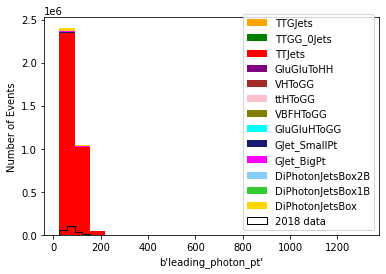

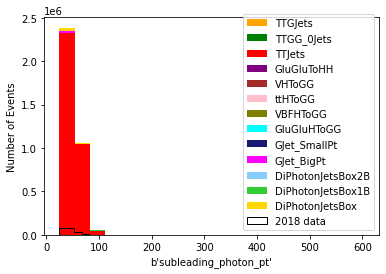

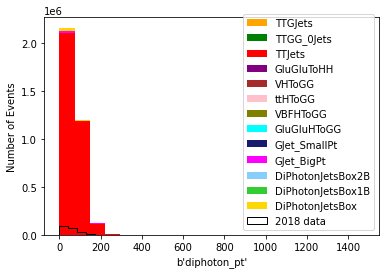

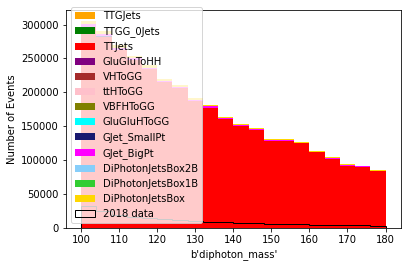

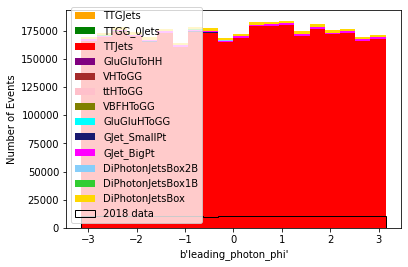

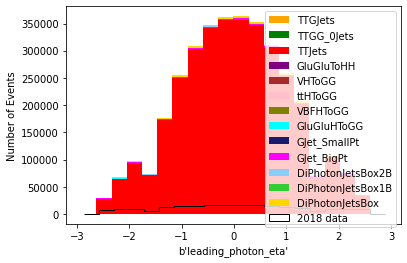

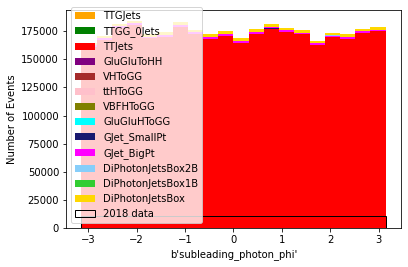

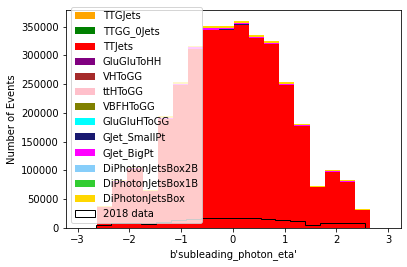

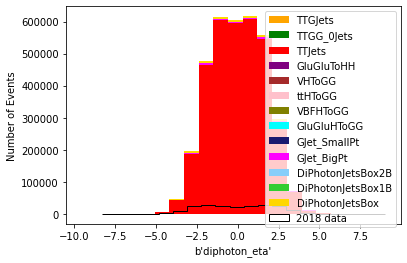

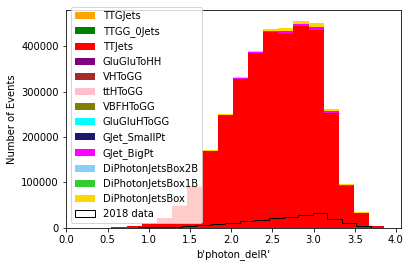

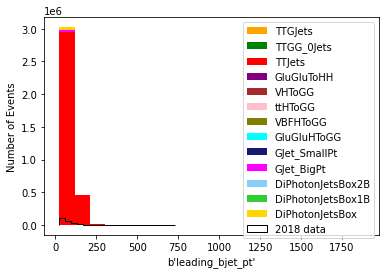

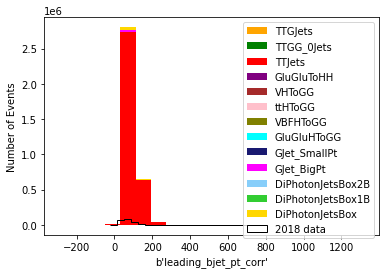

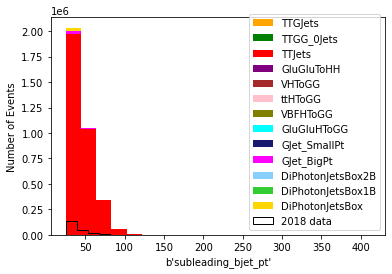

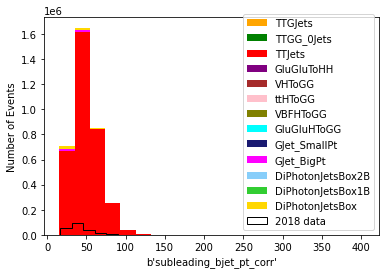

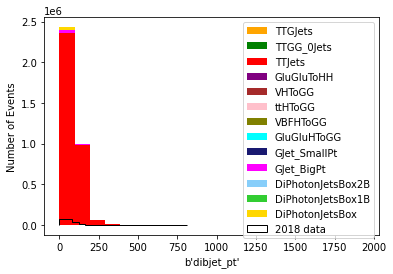

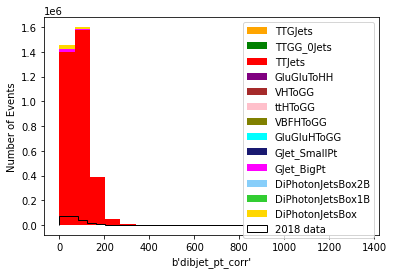

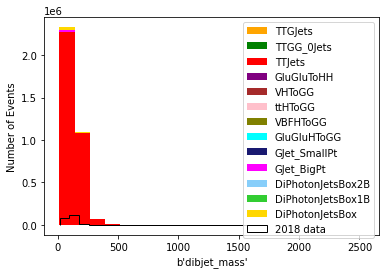

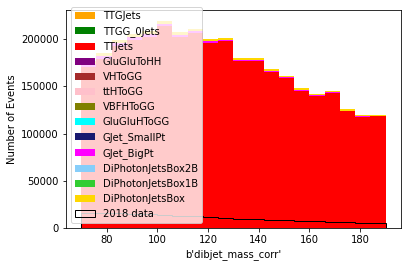

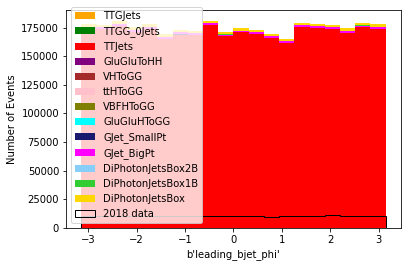

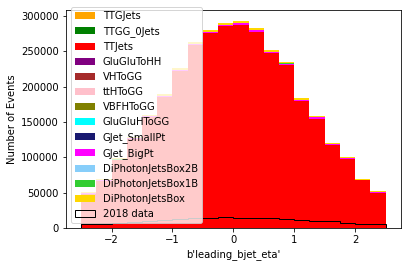

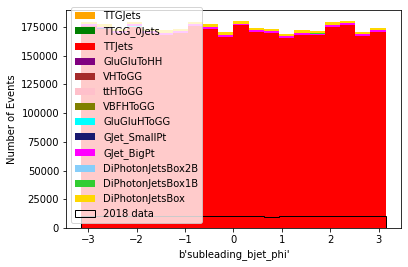

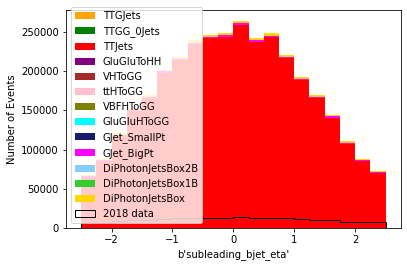

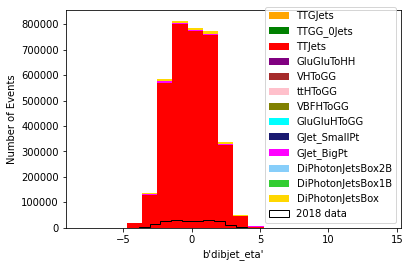

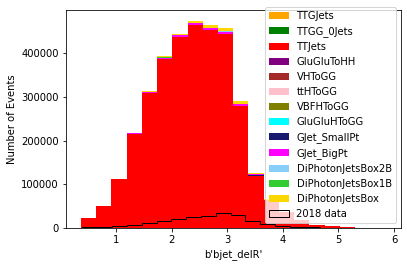

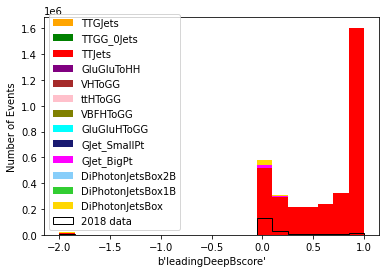

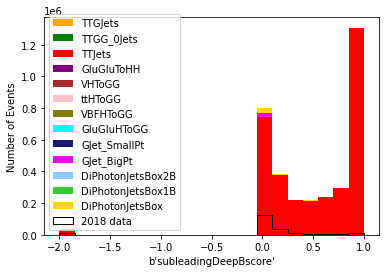

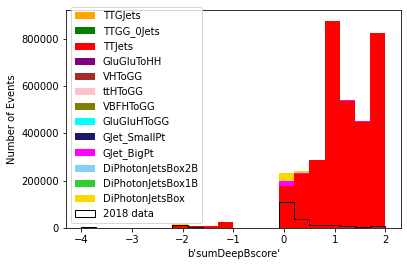

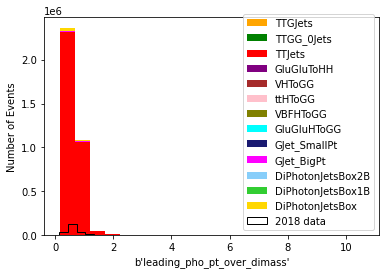

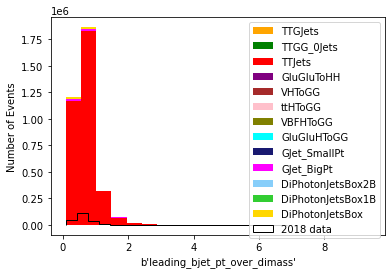

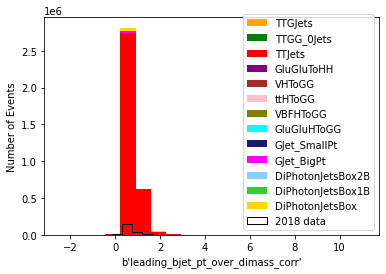

In [13]:
photon_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass', 
               b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
              b'diphoton_eta', b'photon_delR']
bjet_vars = [b'leading_bjet_pt',b'leading_bjet_pt_corr', b'subleading_bjet_pt', b'subleading_bjet_pt_corr', 
             b'dibjet_pt', b'dibjet_pt_corr', b'dibjet_mass', b'dibjet_mass_corr', 
               b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
              b'dibjet_eta', b'bjet_delR']
extra_vars = [b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore', 
             b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr' ]


dfs = [TTGJets_df_2018, TTGG_0Jets_df_2018,TTJets_df_2018, GluGluToHH_df_2018, VHToGG_df_2018, ttHToGG_df_2018, VBFHToGG_df_2018,
      GluGluHToGG_df_2018, GJet_SmallPt_df_2018,  GJet_BigPt_df_2018, DiPhotonJetsBox2B_df_2018, DiPhotonJetsBox1B_df_2018,
      DiPhotonJetsBox_df_2018]
colors = ['orange', 'green', 'red', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold']
names = ['TTGJets', 'TTGG_0Jets', 'TTJets', 'GluGluToHH',
        'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 'GJet_SmallPt', 'GJet_BigPt',
        'DiPhotonJetsBox2B', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox']

for pvar in photon_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, pvar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_2018_full_df.loc[:, pvar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data')
    plt.xlabel(pvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()
    
for bvar in bjet_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, bvar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_2018_full_df.loc[:, bvar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20 ,histtype='step', color = 'black', label=f'2018 data')
    plt.xlabel(bvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()

for evar in extra_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, evar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_2018_full_df.loc[:, evar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20 ,histtype='step', color = 'black', label=f'2018 data')
    plt.xlabel(evar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()

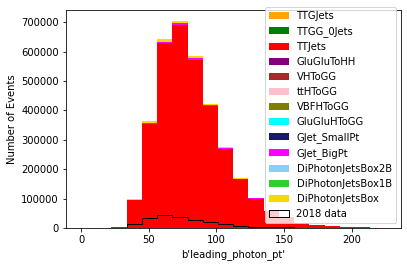

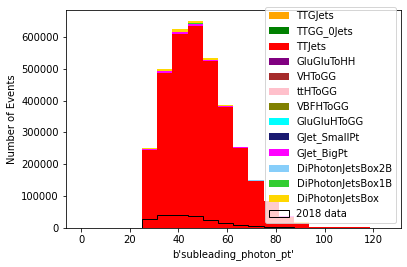

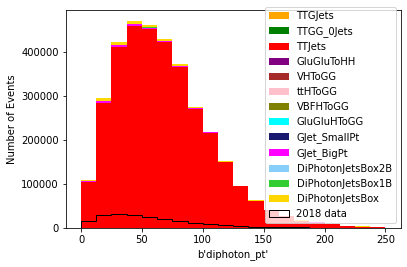

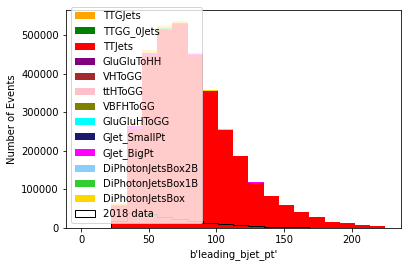

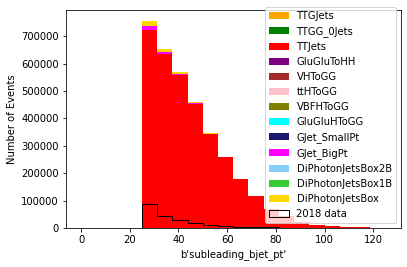

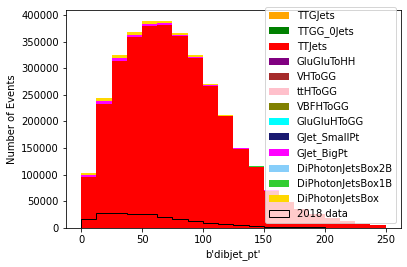

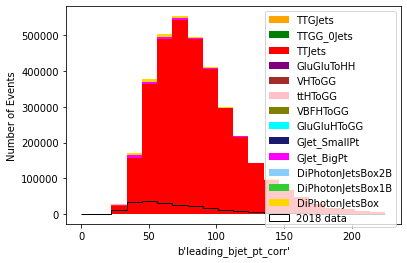

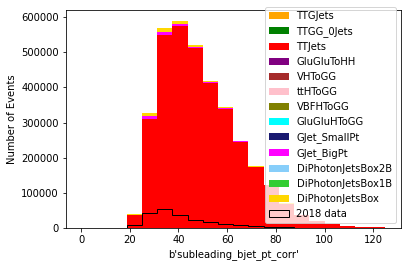

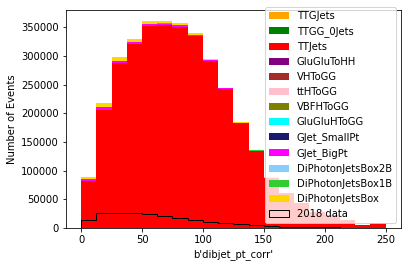

In [15]:
photon_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass', 
               b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
              b'diphoton_eta', b'photon_delR']
bjet_vars = [b'leading_bjet_pt',b'leading_bjet_pt_corr', b'subleading_bjet_pt', b'subleading_bjet_pt_corr', 
             b'dibjet_pt', b'dibjet_pt_corr', b'dibjet_mass', b'dibjet_mass_corr', 
               b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
              b'dibjet_eta', b'bjet_delR']
extra_vars = [b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore', 
             b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr' ]


dfs = [TTGJets_df_2018, TTGG_0Jets_df_2018,TTJets_df_2018, GluGluToHH_df_2018, VHToGG_df_2018, ttHToGG_df_2018, VBFHToGG_df_2018,
      GluGluHToGG_df_2018, GJet_SmallPt_df_2018,  GJet_BigPt_df_2018, DiPhotonJetsBox2B_df_2018, DiPhotonJetsBox1B_df_2018,
      DiPhotonJetsBox_df_2018]
colors = ['orange', 'green', 'red', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold']
names = ['TTGJets', 'TTGG_0Jets', 'TTJets', 'GluGluToHH',
        'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 'GJet_SmallPt', 'GJet_BigPt',
        'DiPhotonJetsBox2B', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox']

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_photon_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'leading_photon_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 225))
plt.xlabel(b'leading_photon_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_photon_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'subleading_photon_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 125))
plt.xlabel(b'subleading_photon_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'diphoton_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'diphoton_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 250))
plt.xlabel(b'diphoton_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()


vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'leading_bjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 225))
plt.xlabel(b'leading_bjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_bjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'subleading_bjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 125))
plt.xlabel(b'subleading_bjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'dibjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 250))
plt.xlabel(b'dibjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'leading_bjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 225))
plt.xlabel(b'leading_bjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_bjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'subleading_bjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 125))
plt.xlabel(b'subleading_bjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'dibjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 250))
plt.xlabel(b'dibjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

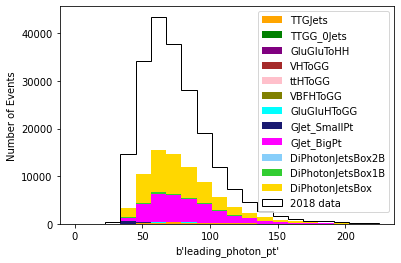

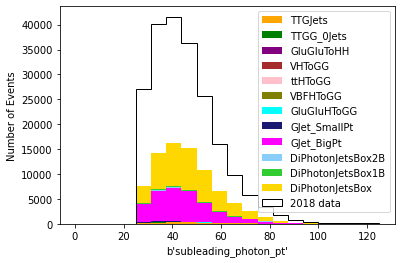

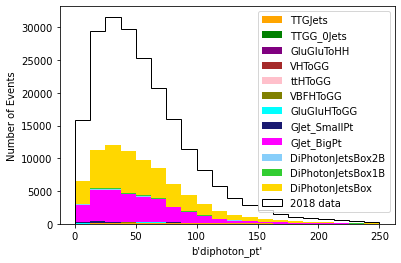

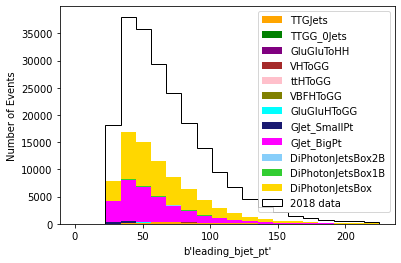

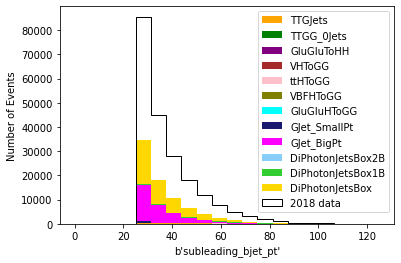

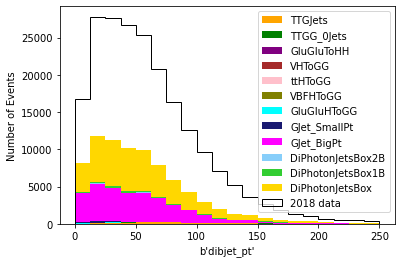

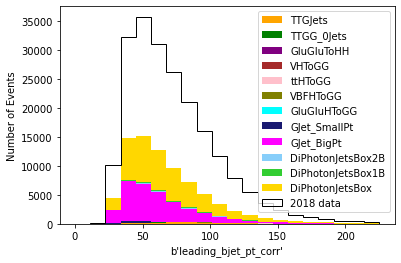

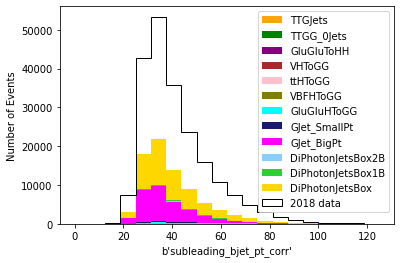

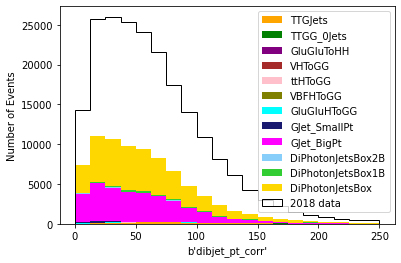

In [16]:
photon_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass', 
               b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
              b'diphoton_eta', b'photon_delR']
bjet_vars = [b'leading_bjet_pt',b'leading_bjet_pt_corr', b'subleading_bjet_pt', b'subleading_bjet_pt_corr', 
             b'dibjet_pt', b'dibjet_pt_corr', b'dibjet_mass', b'dibjet_mass_corr', 
               b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
              b'dibjet_eta', b'bjet_delR']
extra_vars = [b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore', 
             b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr' ]


dfs = [TTGJets_df_2018, TTGG_0Jets_df_2018, GluGluToHH_df_2018, VHToGG_df_2018, ttHToGG_df_2018, VBFHToGG_df_2018,
      GluGluHToGG_df_2018, GJet_SmallPt_df_2018,  GJet_BigPt_df_2018, DiPhotonJetsBox2B_df_2018, DiPhotonJetsBox1B_df_2018,
      DiPhotonJetsBox_df_2018]
colors = ['orange', 'green',  'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold']
names = ['TTGJets', 'TTGG_0Jets', 'GluGluToHH',
        'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 'GJet_SmallPt', 'GJet_BigPt',
        'DiPhotonJetsBox2B', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox']


vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_photon_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'leading_photon_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 225))
plt.xlabel(b'leading_photon_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_photon_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'subleading_photon_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 125))
plt.xlabel(b'subleading_photon_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'diphoton_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'diphoton_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 250))
plt.xlabel(b'diphoton_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()


vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'leading_bjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 225))
plt.xlabel(b'leading_bjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_bjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'subleading_bjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 125))
plt.xlabel(b'subleading_bjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'dibjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 250))
plt.xlabel(b'dibjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'leading_bjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 225))
plt.xlabel(b'leading_bjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_bjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'subleading_bjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 125))
plt.xlabel(b'subleading_bjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_full_df.loc[:, b'dibjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 250))
plt.xlabel(b'dibjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

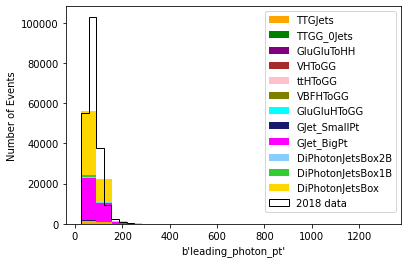

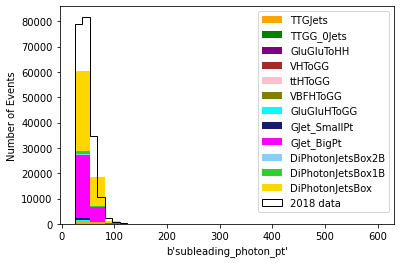

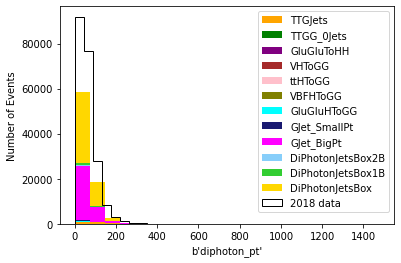

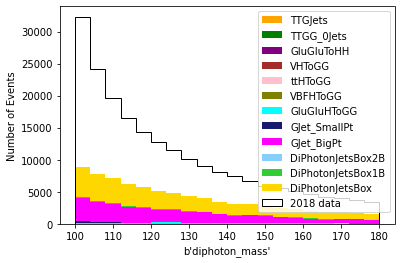

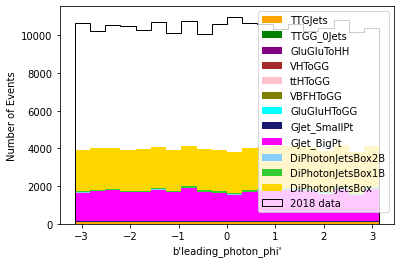

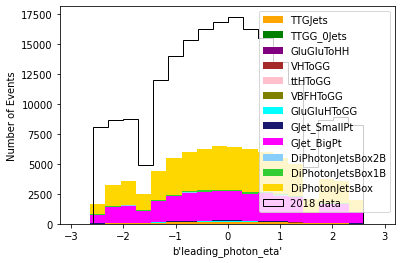

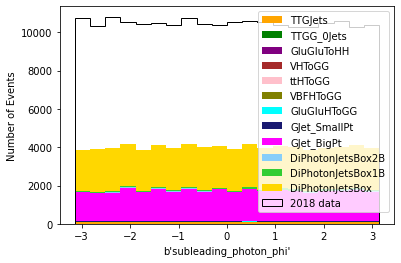

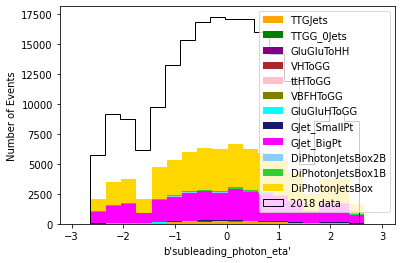

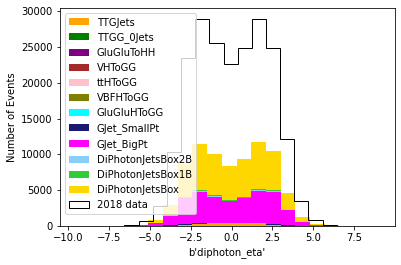

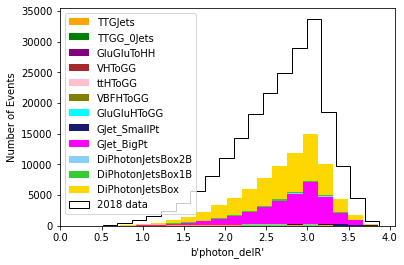

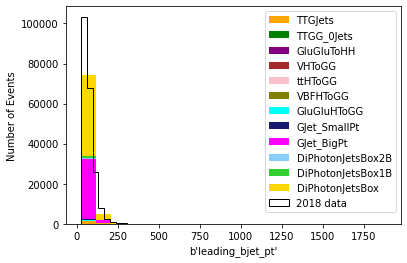

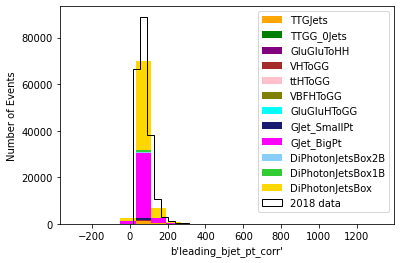

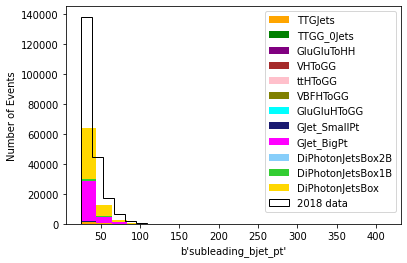

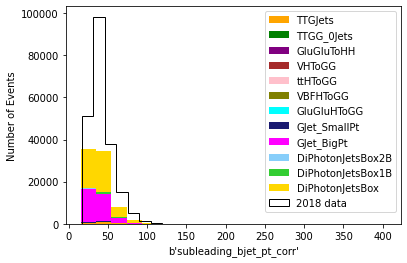

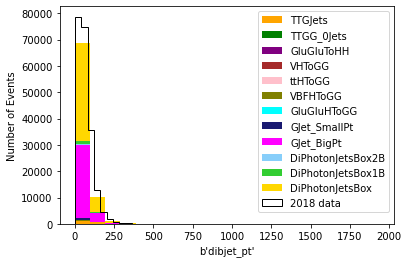

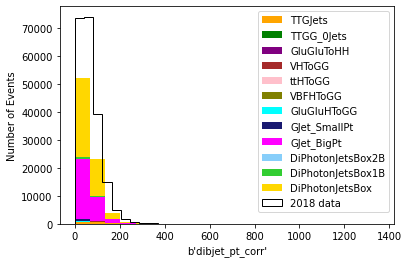

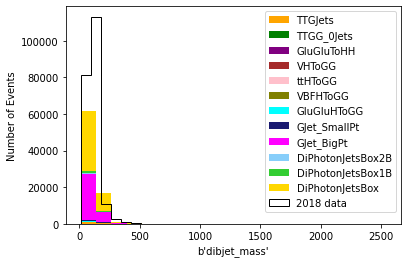

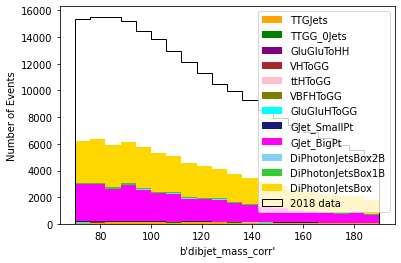

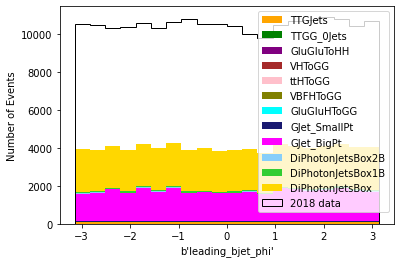

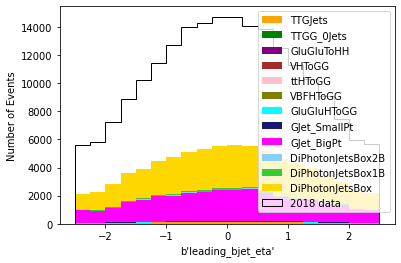

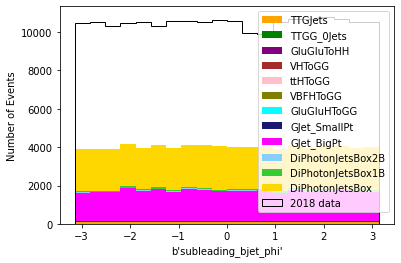

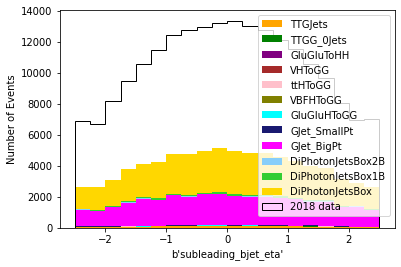

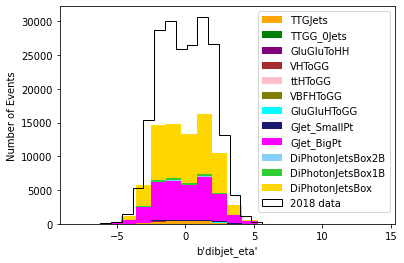

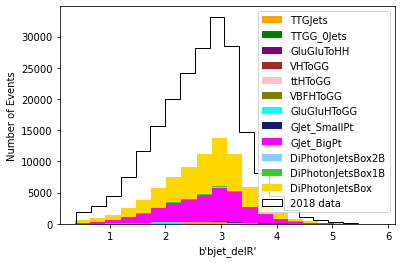

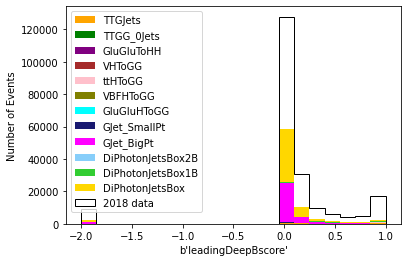

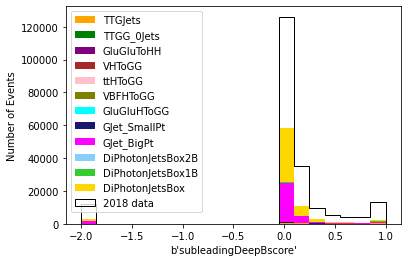

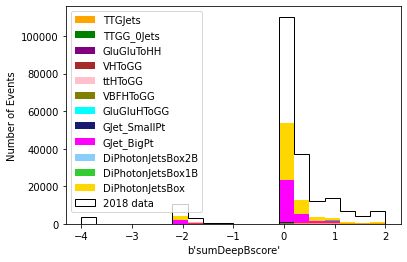

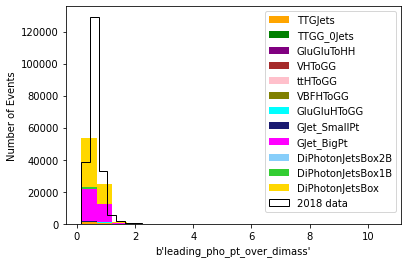

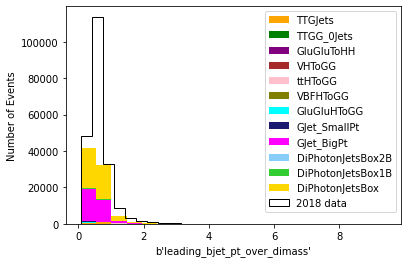

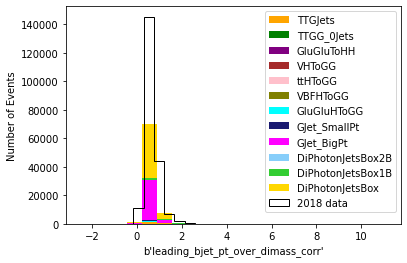

In [11]:
photon_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass', 
               b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
              b'diphoton_eta', b'photon_delR']
bjet_vars = [b'leading_bjet_pt',b'leading_bjet_pt_corr', b'subleading_bjet_pt', b'subleading_bjet_pt_corr', 
             b'dibjet_pt', b'dibjet_pt_corr', b'dibjet_mass', b'dibjet_mass_corr', 
               b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
              b'dibjet_eta', b'bjet_delR']
extra_vars = [b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore', 
             b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr' ]


dfs = [TTGJets_df_2018, TTGG_0Jets_df_2018, GluGluToHH_df_2018, VHToGG_df_2018, ttHToGG_df_2018, VBFHToGG_df_2018,
      GluGluHToGG_df_2018, GJet_SmallPt_df_2018,  GJet_BigPt_df_2018, DiPhotonJetsBox2B_df_2018, DiPhotonJetsBox1B_df_2018,
      DiPhotonJetsBox_df_2018]
colors = ['orange', 'green', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold']
names = ['TTGJets', 'TTGG_0Jets', 'GluGluToHH',
        'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 'GJet_SmallPt', 'GJet_BigPt',
        'DiPhotonJetsBox2B', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox']

for pvar in photon_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, pvar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_2018_full_df.loc[:, pvar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data')
    plt.xlabel(pvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()
    
for bvar in bjet_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, bvar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_2018_full_df.loc[:, bvar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20 ,histtype='step', color = 'black', label=f'2018 data')
    plt.xlabel(bvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()

for evar in extra_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, evar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_2018_full_df.loc[:, evar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20 ,histtype='step', color = 'black', label=f'2018 data')
    plt.xlabel(evar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()

In [17]:
def convert_json_txt_to_dict(file_name):
    with open(file_name) as file:
        data = file.read()
    return json.loads(data)

def good_lumi_list(data_df, good_lumi_dict):
    events = data_df.loc[:, b'event'].values
    lumis = []
    for event in events:
        if str(event) in good_lumi_dict:
            lumis.append(good_lumi_dict[str(event)])
        else:
            lumis.append(None)
    return lumis

In [18]:
Good_Lum_2018 = convert_json_txt_to_dict('../HHbbggAna/data/GoodRunJSON/Cert_314472-325175_13TeV_17SeptEarlyReReco2018ABC_PromptEraD_Collisions18_JSON.txt')

In [20]:
data_2018_full_df[b'good_lumi_range'] = good_lumi_list(data_2018_full_df, Good_Lum_2018)

In [23]:
data_2018_full_df[data_2018_full_df[b'good_lumi_range'].isnull()].head()

,b'run',b'lumi',b'event',b'trig_decision',b'pv_pass',b'leading_photon_pt',b'leading_photon_eta',b'leading_photon_phi',b'subleading_photon_pt',b'subleading_photon_eta',...,b'sumDeepBscore',b'leading_pho_pt_over_dimass',b'leading_bjet_pt_over_dimass',b'leading_bjet_pt_over_dimass_corr',b'fatJetPt',b'fatJetEta',b'fatJetPhi',b'fatJetMassSD_UnCorrected',b'fatJetbtagDDBvL',b'good_lumi_range'
0,315801,80,82289337,1,1,94.318581,0.510864,1.455078,28.739399,1.392822,...,0.173233,0.713737,0.629701,0.678542,-999.0,-999.0,-999.0,-999.0,-999.0,None
1,315801,89,91094387,1,1,92.063103,-1.227051,2.780273,42.311184,0.087067,...,1.994141,0.589443,2.716135,1.685364,-999.0,-999.0,-999.0,-999.0,-999.0,None
2,315801,97,99509134,1,1,50.366177,2.032715,1.892334,41.985119,0.876587,...,0.066742,0.478184,0.584350,0.592763,-999.0,-999.0,-999.0,-999.0,-999.0,None
3,315801,169,170221697,1,1,85.579910,-1.138672,-0.582275,53.044937,-2.199219,...,0.175964,0.572546,1.128323,1.045545,-999.0,-999.0,-999.0,-999.0,-999.0,None
4,315801,278,272072448,1,1,88.769356,-0.200317,-0.789917,32.812851,-0.869507,...,0.135834,0.781829,0.540632,0.563802,-999.0,-999.0,-999.0,-999.0,-999.0,None


In [24]:
data_2018_full_df[~data_2018_full_df[b'good_lumi_range'].isnull()].head()

,b'run',b'lumi',b'event',b'trig_decision',b'pv_pass',b'leading_photon_pt',b'leading_photon_eta',b'leading_photon_phi',b'subleading_photon_pt',b'subleading_photon_eta',...,b'sumDeepBscore',b'leading_pho_pt_over_dimass',b'leading_bjet_pt_over_dimass',b'leading_bjet_pt_over_dimass_corr',b'fatJetPt',b'fatJetEta',b'fatJetPhi',b'fatJetMassSD_UnCorrected',b'fatJetbtagDDBvL',b'good_lumi_range'
